In [0]:
from zipfile import ZipFile
file_name='negative-images.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
#!git clone https://github.com/JoakimSoderberg/haarcascade-negatives

Cloning into 'haarcascade-negatives'...
remote: Enumerating objects: 3018, done.
remote: Counting objects: 100% (3018/3018), done.
remote: Compressing objects: 100% (3017/3017), done.
remote: Total 3018 (delta 0), reused 3018 (delta 0), pack-reused 0
Receiving objects: 100% (3018/3018), 76.07 MiB | 38.37 MiB/s, done.


In [0]:
#import cv2
#!rm -rf haarcascade-negatives

In [0]:
import os
import cv2
count=0
path="/content/Negative_Images"
for img in os.listdir(path):
  img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
  if img_array is None:
    print("None found")
  else:
    count=count+1
    resized_image = cv2.resize(img_array, (100, 100))
    cv2.imwrite(os.path.join(path,img),resized_image)
  #print(img_array.shape)
print(count)

3030


In [0]:
for img in os.listdir(path):
  line = os.path.join(path,img)
  line=line+'\n'
  with open('bg.txt','a') as f:
    f.write(line)
  line=""

In [0]:
#cd /content/haarcascade-negatives/images

/content/haarcascade-negatives/images


In [0]:
#photo_img=cv2.imread("phone_cropped2.jpg",cv2.IMREAD_GRAYSCALE)
#resized_image = cv2.resize(photo_img, (50, 50))
#cv2.imwrite("phone_cropped2.jpg",resized_image)
count=0
ppath="/content/Positives"
for img in os.listdir(ppath):
  img_array=cv2.imread(os.path.join(ppath,img), cv2.IMREAD_GRAYSCALE)
  if img_array is None:
    print("None found")
  else:
    count=count+1
    resized_image = cv2.resize(img_array, (40,40))
    cv2.imwrite(os.path.join(ppath,img),resized_image)
  #print(img_array.shape)
print(count)

19


In [0]:
#line = '/content/phone_cropped2.jpg'+' 1 0 0 50 50\n'
#with open('info.dat','a') as f:
#  f.write(line)
os.system('ls -l')

0

In [0]:
#count=0
#for img in os.listdir(ppath):
#  mypath=os.path.join(ppath,img)
  #img_array=cv2.imread(os.path.join(ppath,img), cv2.IMREAD_GRAYSCALE)
  #print(mypath)
!opencv_createsamples -img /content/Positives/phone_cropped7.jpg -bg bg.txt -info info/info19.lst -pngoutput info -maxxangle 0.5 -maxyangle 0.5 -maxzangle 0.5 -num 152 -bgcolor 255

Info file name: info/info19.lst
Img file name: /content/Positives/phone_cropped7.jpg
Vec file name: (NULL)
BG  file name: bg.txt
Num: 152
BG color: 255
BG threshold: 80
Invert: FALSE
Max intensity deviation: 40
Max x angle: 0.5
Max y angle: 0.5
Max z angle: 0.5
Show samples: FALSE
Width: 24
Height: 24
Max Scale: -1
Create test samples from single image applying distortions...
Open background image: /content/Negative_Images/Negative 691.jpg
Open background image: /content/Negative_Images/Negative 2377.png
Open background image: /content/Negative_Images/Negative 596.jpg
Open background image: /content/Negative_Images/Negative 2668.jpg
Open background image: /content/Negative_Images/Negative 840.jpg
Open background image: /content/Negative_Images/Negative 2026.png
Open background image: /content/Negative_Images/Negative 1178.jpg
Open background image: /content/Negative_Images/Negative 2723.jpg
Open background image: /content/Negative_Images/Negative 510.jpg
Open background image: /content

In [0]:
filenames = ['/content/info/info1.lst', '/content/info/info2.lst', '/content/info/info3.lst','/content/info/info4.lst','/content/info/info5.lst','/content/info/info6.lst','/content/info/info7.lst','/content/info/info8.lst','/content/info/info9.lst','/content/info/info10.lst','/content/info/info11.lst','/content/info/info13.lst','/content/info/info14.lst','/content/info/info15.lst','/content/info/info16.lst','/content/info/info17.lst','/content/info/info18.lst','/content/info/info19.lst']
with open('info.lst', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)


In [0]:
!opencv_createsamples -info info/info.lst -num 2700 -w 30 -h 30 -vec positives.vec

Info file name: info/info.lst
Img file name: (NULL)
Vec file name: positives.vec
BG  file name: (NULL)
Num: 2700
BG color: 0
BG threshold: 80
Invert: FALSE
Max intensity deviation: 40
Max x angle: 1.1
Max y angle: 1.1
Max z angle: 0.5
Show samples: FALSE
Width: 30
Height: 30
Max Scale: -1
Create training samples from images collection...
Done. Created 2700 samples


In [0]:
!opencv_traincascade -data data -vec positives.vec -bg bg.txt -numPos 2400 -numNeg 1200 -numStages 13 -minHitRate 0.995 -maxFalseAlarmRate 0.5 -w 30 -h 30

---------------------------------------------------------------------------------
Training parameters are pre-loaded from the parameter file in data folder!
Please empty this folder if you want to use a NEW set of training parameters.
---------------------------------------------------------------------------------
PARAMETERS:
cascadeDirName: data
vecFileName: positives.vec
bgFileName: bg.txt
numPos: 2400
numNeg: 1200
numStages: 13
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: HAAR
sampleWidth: 30
sampleHeight: 30
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.5
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 100
mode: BASIC
Number of unique features given windowSize [30,30] : 394725

Stages 0-9 are loaded

===== TRAINING 10-stage =====
<BEGIN
POS count : consumed   2400 : 2516
NEG count : acceptanceRatio    1200 : 0.00253646
tcmalloc: large alloc 1073741824 bytes == 0x55b8be284000 @  0x7f239e3281e7 0x7f239d

In [0]:
!opencv_traincascade -data data -vec positives.vec -bg bg.txt -numPos 2400 -numNeg 1200 -numStages 11 -minHitRate 0.995 -maxFalseAlarmRate 0.5 -w 30 -h 30
#!opencv_traincascade -data data -vec positives.vec -bg bg.txt -numPos 2500 -numNeg 1200 -numStages 13 -minHitRate 0.995 -maxFalseAlarmRate 0.5 -w 30 -h 30

---------------------------------------------------------------------------------
Training parameters are pre-loaded from the parameter file in data folder!
Please empty this folder if you want to use a NEW set of training parameters.
---------------------------------------------------------------------------------
PARAMETERS:
cascadeDirName: data
vecFileName: positives.vec
bgFileName: bg.txt
numPos: 2400
numNeg: 1200
numStages: 11
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: HAAR
sampleWidth: 30
sampleHeight: 30
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.5
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 100
mode: BASIC
Number of unique features given windowSize [30,30] : 394725

Stages 0-10 are loaded


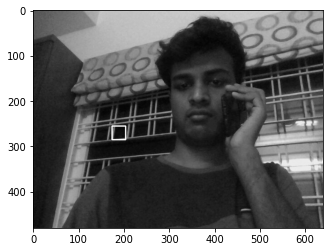

In [0]:
import matplotlib.pyplot as plt
import cv2
phone_cascade = cv2.CascadeClassifier('/content/cascade_model1.xml')
# Read the input image
img = cv2.imread('/content/talkonphone.jpg',cv2.IMREAD_GRAYSCALE)
# Convert into grayscale
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
phones = phone_cascade.detectMultiScale(img, 4, 2)
# Draw rectangle around the faces
for (x, y, w, h) in phones:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
plt.imshow(img,cmap="gray")

In [0]:
print(len(phones))

1
